In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [9]:
pd.set_option('display.max_columns', None)

# 0. Data I/O

In [10]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [11]:
print("The size of the dataset: ", data.shape)

The size of the dataset:  (8124, 23)


# 1. Exploratory Data Analysis (EDA)

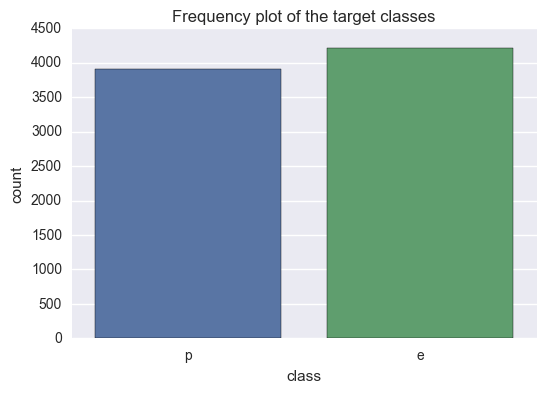

In [15]:
# Plotting the frequency plot for the class
sns.set(style="darkgrid")
f=sns.countplot(x="class", data=data)
f.set_title("Frequency plot of the target classes")

** The data set is well balanced over the classes **

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

** All the data is categorical data... The best way is to use One hot encoding to convert into numerical Sparse matrix **

In [14]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


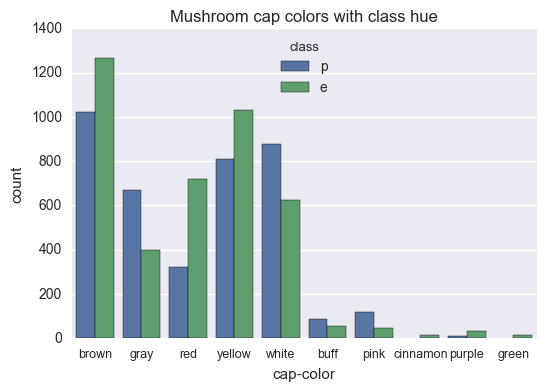

In [19]:
# Plotting the frequency plot for the cap colors class
sns.set(style="darkgrid")
f=sns.countplot(x="cap-color",hue='class', data=data)
f.set_title("Mushroom cap colors with class hue")
f.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 9)

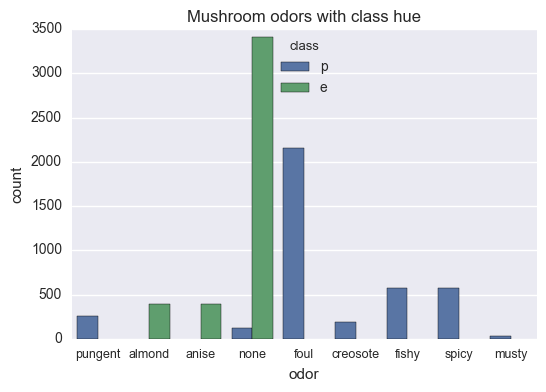

In [21]:
# Plotting the frequency plot for the cap colors class
sns.set(style="darkgrid")
f=sns.countplot(x="odor",hue='class', data=data)
f.set_title("Mushroom odors with class hue")
#almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
f.set_xticklabels(('pungent', 'almond','anise','none','foul','creosote','fishy','spicy','musty'),
                  fontsize = 9)

** Can be done similarly for all the classes as all the features are categorical**

# 2. Data Preprocessing for Machine Learning

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [28]:
data_enc=data.apply(LabelEncoder().fit_transform) # does multicolumn label encoding
data_enc.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [29]:
X=data_enc.drop('class',axis=1)
Y=data_enc['class']

In [31]:
X_1hot=OneHotEncoder().fit_transform(X.values)

In [32]:
X_1hot.shape # to check this we can use pd.get_dummies

(8124, 117)

In [34]:
data_cat=data.drop('class',axis=1)
data_cat_dummies=pd.get_dummies(data_cat)
data_cat_dummies.shape # the number of columns did match with one hot encoding and get_dummies method

(8124, 117)

In [35]:
data_cat_dummies.head(2)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


** The number of columns did match with one hot encoding and get_dummies method **

** Now the sparse matrix with numerical values are ready with the labels for Machine Learning classifier **

# 3. Applying different Machine Learning CLFs using the dataset

## 3.1 Supervisied Learning Algorithms

In [46]:
# Scale the data to be between -1 and 1
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_sc=scaler.fit_transform(X_1hot)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_1hot,Y,test_size=0.3,random_state=0)

In [40]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report


In [41]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_lgr=LogisticRegression(random_state=0)
clf_lgr.fit(X_train,Y_train)
pred_lgr=clf_lgr.predict(X_test)
print("The accuracy of the Logistic regression Classifier: ", accuracy_score(Y_test,pred_lgr))

The accuracy of the Logistic regression Classifier:  1.0


Recall metric in the testing dataset:  1.0


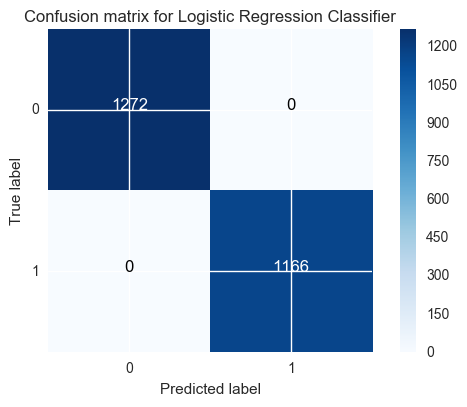

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,pred_lgr)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix for Logistic Regression Classifier')
plt.show()

In [49]:
from sklearn.svm import SVC
clf_svc=SVC(random_state=0)
clf_svc.fit(X_train,Y_train)
pred_svc=clf_svc.predict(X_test)
print("The accuracy of the Support Vector Classifier: ", accuracy_score(Y_test,pred_svc))

The accuracy of the Logistic regression Classifier:  0.999179655455


Recall metric in the testing dataset:  0.998284734134


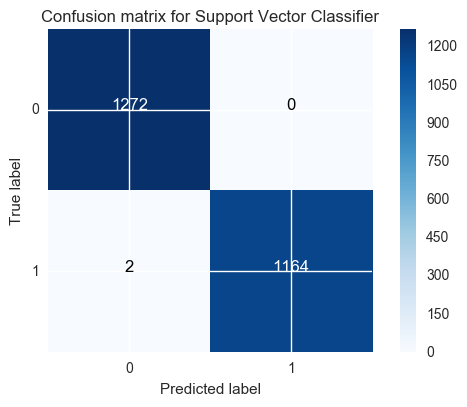

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,pred_svc)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix for Support Vector Classifier')
plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf_dt=DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
pred_dt=clf_dt.predict(X_test)
print("The accuracy of the Decision Tree Classifier: ", accuracy_score(Y_test,pred_dt))

The accuracy of the Decision Tree Classifier:  1.0


Recall metric in the testing dataset:  1.0


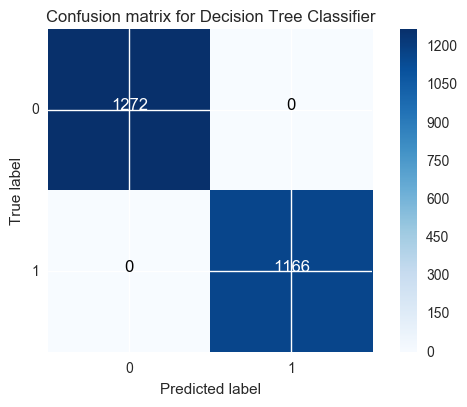

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,pred_dt)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix for Decision Tree Classifier')
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train,Y_train)
pred_rf=clf_rf.predict(X_test)
print("The accuracy of the Random Forest Classifier: ", accuracy_score(Y_test,pred_rf))

The accuracy of the Random Forest Classifier:  1.0


Recall metric in the testing dataset:  1.0


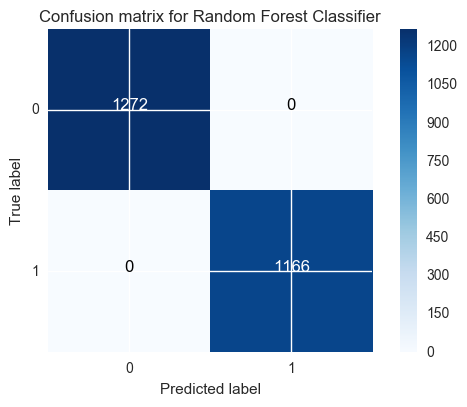

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,pred_rf)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix for Random Forest Classifier')
plt.show()

In [63]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]

x_cols=list(data_cat_dummies.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_1hot.shape[1]):
    print("%d. feature %s : %f" % (f + 1, x_cols[f], importances[indices[f]]))

Feature ranking:
1. feature cap-shape_b : 0.224518
2. feature cap-shape_c : 0.097090
3. feature cap-shape_f : 0.072480
4. feature cap-shape_k : 0.065693
5. feature cap-shape_s : 0.063626
6. feature cap-shape_x : 0.050239
7. feature cap-surface_f : 0.026739
8. feature cap-surface_g : 0.026314
9. feature cap-surface_s : 0.025642
10. feature cap-surface_y : 0.025272
11. feature cap-color_b : 0.024114
12. feature cap-color_c : 0.022475
13. feature cap-color_e : 0.022231
14. feature cap-color_g : 0.021387
15. feature cap-color_n : 0.019049
16. feature cap-color_p : 0.017227
17. feature cap-color_r : 0.015343
18. feature cap-color_u : 0.014989
19. feature cap-color_w : 0.014114
20. feature cap-color_y : 0.012722
21. feature bruises_f : 0.012280
22. feature bruises_t : 0.012267
23. feature odor_a : 0.010137
24. feature odor_c : 0.009935
25. feature odor_f : 0.006736
26. feature odor_l : 0.006129
27. feature odor_m : 0.005586
28. feature odor_n : 0.005551
29. feature odor_p : 0.004033
30. feat

## 3.2 Unsupervised Learning Algorithms

### 3.2.1 Principal Component Analysis

** PCA does not support sparse matrices so inorder to have this dataset as desne matrix , just the encoded matrix is considered **

In [67]:
X_dense=data_enc.drop('class',axis=1)
from sklearn.preprocessing import StandardScaler
X_scaled=StandardScaler().fit_transform(X_dense)
X_scaled.shape

(8124, 22)

In [69]:
from sklearn.decomposition import PCA
pca=PCA()
x_trf=pca.fit_transform(X_scaled)

In [86]:
var=(pca.explained_variance_)
tot=sum(var)
var_exp = [(i/tot)*100 for i in sorted(var, reverse=True)] # Individual explained variance

In [80]:
exp_var_ratio=pca.explained_variance_ratio_
cum_var=np.cumsum(exp_var_ratio*100)

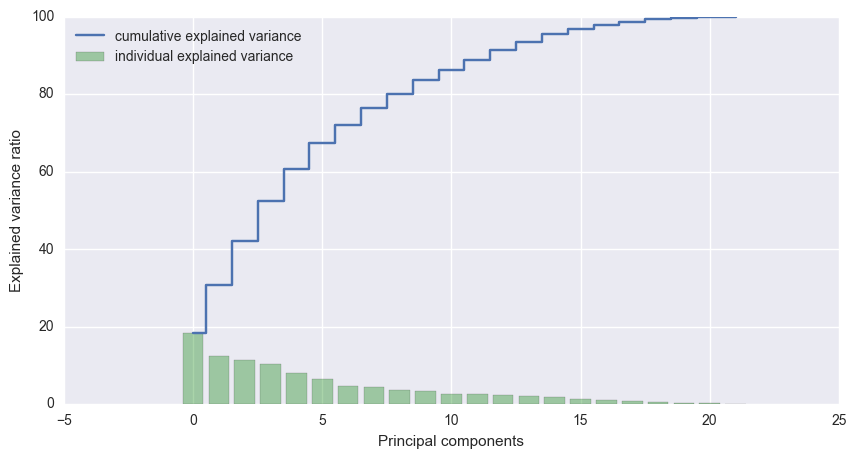

In [120]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(22), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(22), cum_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

** Here we can see 98% of variance is retained in 17 components. So now we can decompose the data into 17 principal components **

In [133]:
from sklearn.decomposition import PCA
pca=PCA(n_components=17)
x_trf_17d=pca.fit_transform(X_scaled)


In [134]:
data_pca=pd.DataFrame(x_trf_17d,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])
#data_pca=pd.DataFrame(x_trf_17d,columns=['PC1','PC2'])

In [135]:
#data_pca_km=pd.DataFrame(x_trf_17d,columns=['PC1','PC2'])
data_pca_km=pd.DataFrame(x_trf_17d,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

In [136]:
data_pca["Actual Class"]=data_enc["class"]

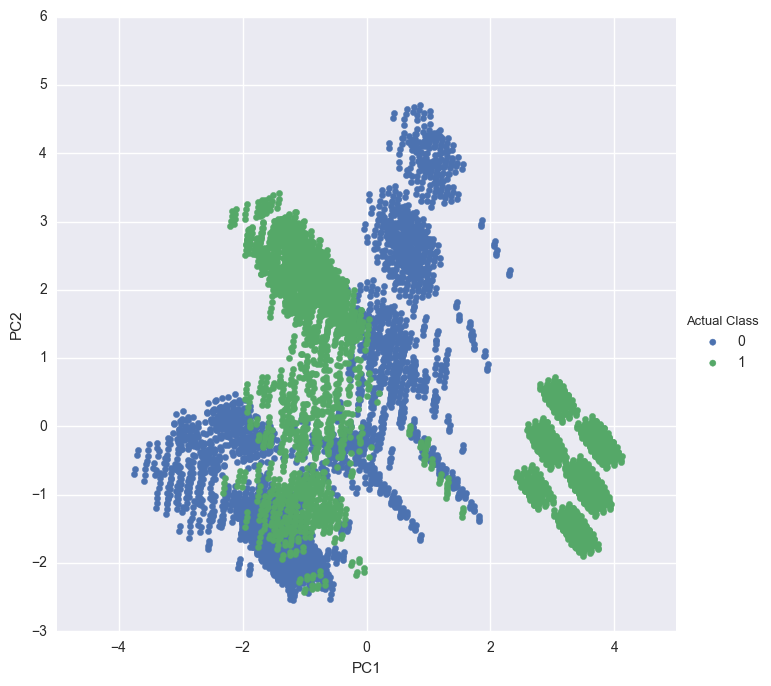

In [137]:
sns.FacetGrid(data_pca, hue="Actual Class", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()

In [138]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,random_state=0)
km.fit(data_pca_km)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(data_pca_km)
y_cluster_kmeans

array([0, 0, 0, ..., 0, 1, 0])

In [139]:
data_pca_km["Cluster Predictions"]=y_cluster_kmeans
data_pca_km.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Cluster Predictions
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,0.821627,0.080134,0.611855,-0.519966,-0.782544,1.120259,0
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,-1.387830,-0.185504,-0.916553,-0.113078,-0.730934,-0.018174,0


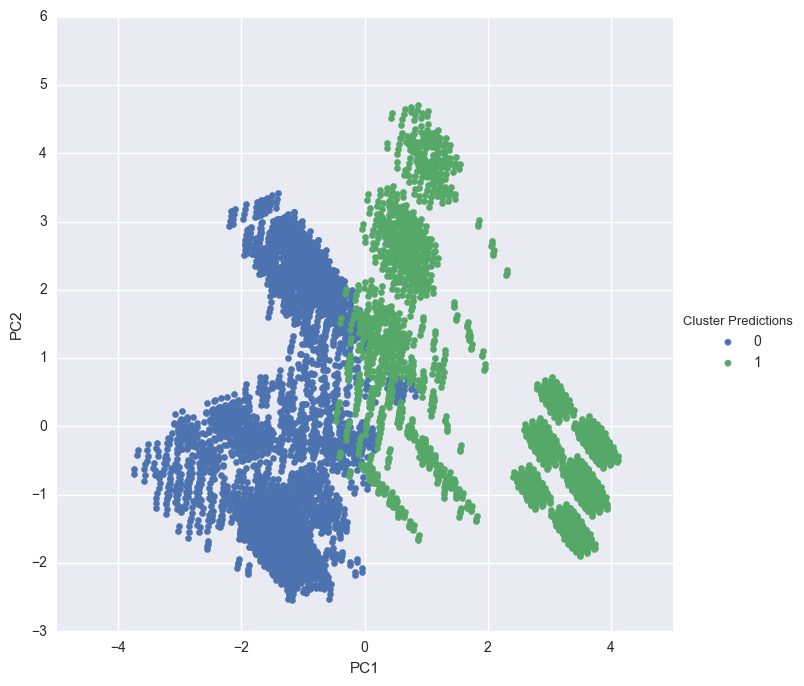

In [140]:
sns.FacetGrid(data_pca_km, hue="Cluster Predictions", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()

In [141]:

from sklearn.mixture import GaussianMixture
#data_pca_gmm=pd.DataFrame(x_trf_17d,columns=['PC1','PC2'])
data_pca_gmm=pd.DataFrame(x_trf_17d,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

In [142]:
gmm=GaussianMixture(n_components=2)
gmm.fit(data_pca_gmm)
# predict the cluster for each data point
y_cluster_gmm = km.predict(data_pca_gmm)
y_cluster_gmm

array([0, 0, 0, ..., 0, 1, 0])

In [143]:
data_pca_gmm["Cluster Predictions"] = y_cluster_gmm

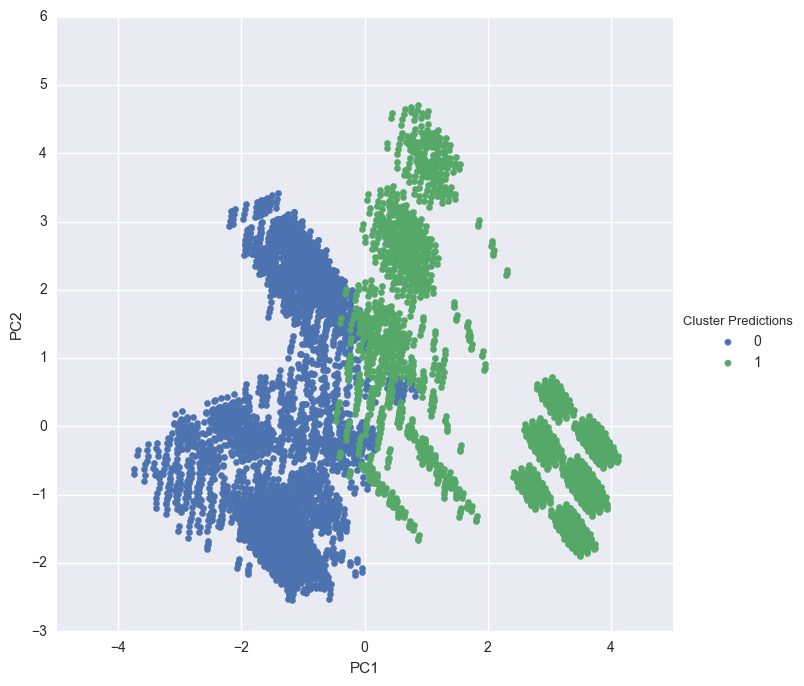

In [144]:
sns.FacetGrid(data_pca_gmm, hue="Cluster Predictions", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()

In [145]:
from sklearn.decomposition import KernelPCA
pca=KernelPCA(n_components=2)
x_trf_2d=pca.fit_transform(X_scaled)

In [146]:
data_kpca=pd.DataFrame(x_trf_2d,columns=['PC1','PC2'])

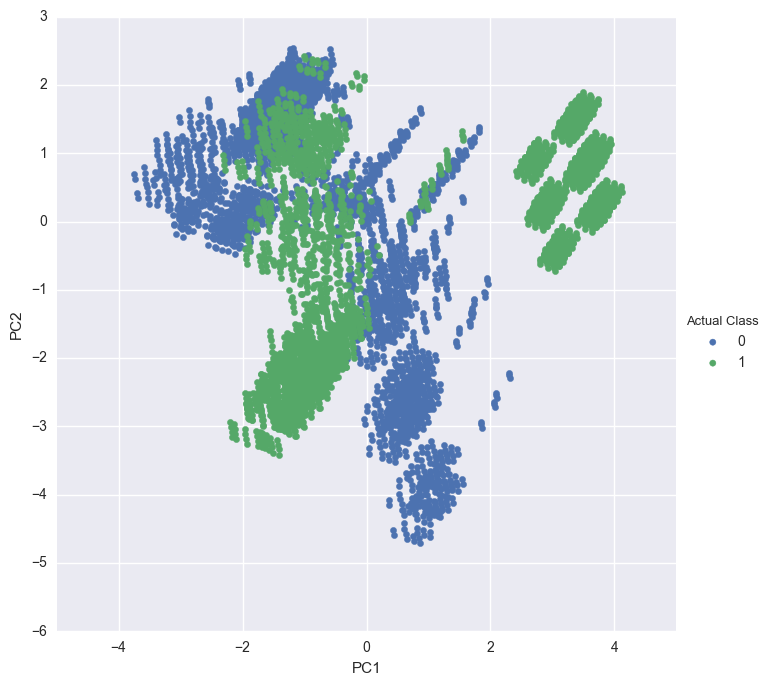

In [147]:
data_kpca["Actual Class"]=data_enc["class"]
sns.FacetGrid(data_kpca, hue="Actual Class", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()